In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hellbuoy/car-price-prediction")

print(r"C:\Users\user\Documents\Machine Learning", path)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\user\Documents\Machine Learning C:\Users\user\.cache\kagglehub\datasets\hellbuoy\car-price-prediction\versions\1


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'C:\Users\user\Documents\Machine Learning\car_price_prediction\CarPrice_Assignment.csv')

df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Documents\\Machine Learning\\car_price_prediction\\CarPrice_Assignment.csv'

In [ ]:
# Check for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Drop rows where price is missing
df = df.dropna(subset=['price'])

In [ ]:
#Fill mileage values for both columns
df.fillna(
    {
        'citympg': df['citympg'].mean(),
        'highwaympg': df['highwaympg'].mean()
    },
    inplace=True
)

# Check if any missing values remain
print(df[['citympg', 'highwaympg']].isnull().sum())

citympg       0
highwaympg    0
dtype: int64


In [ ]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Check Fuel type unique values
print(df['fueltype'].value_counts(dropna=False))

fueltype
gas       185
diesel     20
Name: count, dtype: int64


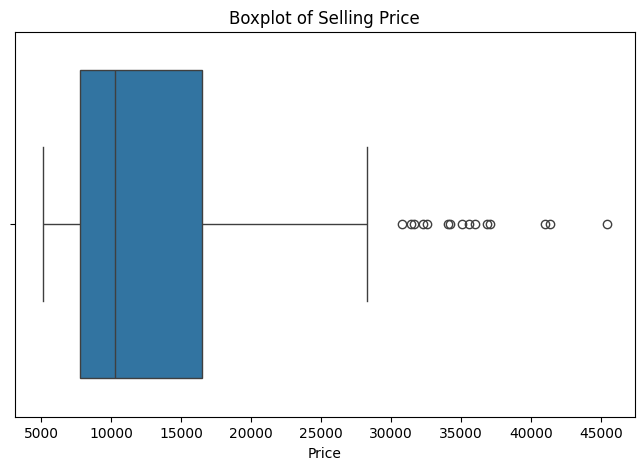

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the selling price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Selling Price')
plt.xlabel('Price')
plt.show()

In [ ]:
# Remove extreme prices
df = df[(df['price'] >= 10000) & (df['price'] <= 5000000)]


In [ ]:
# Clean column names
df.columns = (
    df.columns
    .str.strip()                     # Remove leading/trailing spaces
    .str.lower()                    # Make all lowercase
    .str.replace(' ', '_')          # Replace spaces with underscores
    .str.replace('[^a-z0-9_]', '',regex=True)  # Remove special characters
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_id            105 non-null    int64  
 1   symboling         105 non-null    int64  
 2   carname           105 non-null    object 
 3   fueltype          105 non-null    object 
 4   aspiration        105 non-null    object 
 5   doornumber        105 non-null    object 
 6   carbody           105 non-null    object 
 7   drivewheel        105 non-null    object 
 8   enginelocation    105 non-null    object 
 9   wheelbase         105 non-null    float64
 10  carlength         105 non-null    float64
 11  carwidth          105 non-null    float64
 12  carheight         105 non-null    float64
 13  curbweight        105 non-null    int64  
 14  enginetype        105 non-null    object 
 15  cylindernumber    105 non-null    object 
 16  enginesize        105 non-null    int64  
 17  fu

In [ ]:
# Find columns with object (string) type
string_cols = df.select_dtypes(include=['object']).columns

# Try converting each to numeric where possible
for col in string_cols:
    df[col] = pd.to_numeric(df[col], errors='ignore')

# Show columns that are still strings
df.select_dtypes(include=['object']).columns

C:\Users\user\AppData\Local\Temp\ipykernel_7516\1043959169.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


Index(['carname', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [ ]:
# First, create an average mileage column from city and highway mpg
df['avgmpg'] = (df['citympg'] + df['highwaympg']) / 2

# Convert mpg to km/l (if you want it in kilometers)
df['avg_kmpl'] = df['avgmpg'] * 1.60934 / 3.78541  # 1 mile = 1.60934 km, 1 gallon = 3.78541 liters

# Create price per kilometer
df['price_per_km'] = df['price'] / df['avg_kmpl']

df.head()

,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,avg_kmpl,price_per_km
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,13495.0,24.0,10.203428,1322.594665
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,2.68,9.0,111,5000,21,27,16500.0,24.0,10.203428,1617.103518
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,22.5,9.565714,1724.910419
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.40,10.0,102,5500,24,30,13950.0,27.0,11.478857,1215.277795
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.40,8.0,115,5500,18,22,17450.0,20.0,8.502857,2052.251373


In [ ]:
#Reset index
df.reset_index()

,index,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,avgmpg,avg_kmpl,price_per_km
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,13495.0,24.0,10.203428,1322.594665
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,2.68,9.0,111,5000,21,27,16500.0,24.0,10.203428,1617.103518
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,3.47,9.0,154,5000,19,26,16500.0,22.5,9.565714,1724.910419
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,3.40,10.0,102,5500,24,30,13950.0,27.0,11.478857,1215.277795
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,3.40,8.0,115,5500,18,22,17450.0,20.0,8.502857,2052.251373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,...,3.15,9.5,114,5400,23,28,16845.0,25.5,10.841143,1553.802995
101,201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,...,3.15,8.7,160,5300,19,25,19045.0,22.0,9.353143,2036.213983
102,202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,...,2.87,8.8,134,5500,18,23,21485.0,20.5,8.715428,2465.168538
103,203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,...,3.40,23.0,106,4800,26,27,22470.0,26.5,11.266286,1994.446163


In [ ]:
# save cleaned dataframe to CSV
df.to_csv('cleaned_car_price_data.csv', index=False)

In [ ]:
#Average selling price
average_price = df['price'].mean()
print(f"Average selling price: {average_price:}")

Average selling price: 18565.85397142857


In [ ]:
#Most common fuel type
most_common_fuel = df['fueltype'].mode()[0]
count = df['fueltype'].value_counts()[most_common_fuel]

print(f"The most common fuel type is '{most_common_fuel}' with {count} cars.")


The most common fuel type is 'gas' with 91 cars.


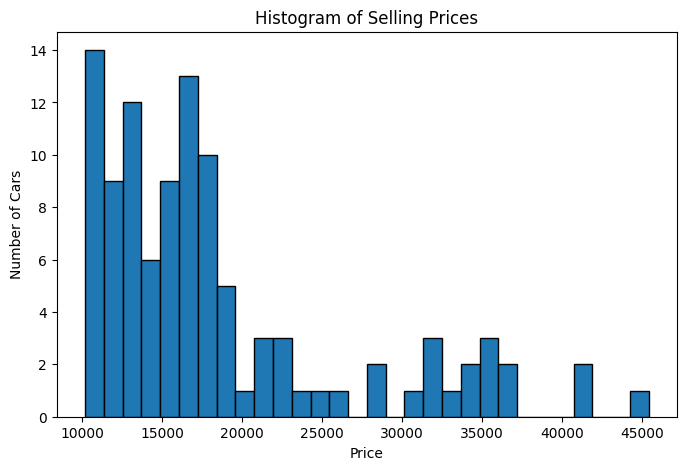

In [ ]:
#Histogram of selling pricesa

plt.figure(figsize=(8, 5))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.title('Histogram of Selling Prices')
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.show()

In [ ]:
# Groupby cars by fueltype and find average selling price for each group 
avg_price_by_fuel = df.groupby('fueltype')['price'].mean().reset_index()
avg_price_by_fuel.columns = ['Fuel Type', 'Average Price']
avg_price_by_fuel['Average Price'] = avg_price_by_fuel['Average Price'].round(2)

print(avg_price_by_fuel)


  Fuel Type  Average Price
0    diesel       19193.79
1       gas       18469.25


In [ ]:
# Show the highest average mileage
highest_avgmpg =  df['avgmpg'].max()

print(highest_avgmpg)

39.0


In [ ]:
# Correlation between avgmpg and price
correlation = df['avgmpg'].corr(df['price'])
print(f"Correlation between mileage and selling price: {correlation:.4f} higher mileage is associated with lower prices ")

Correlation between mileage and selling price: -0.5677 higher mileage is associated with lower prices 


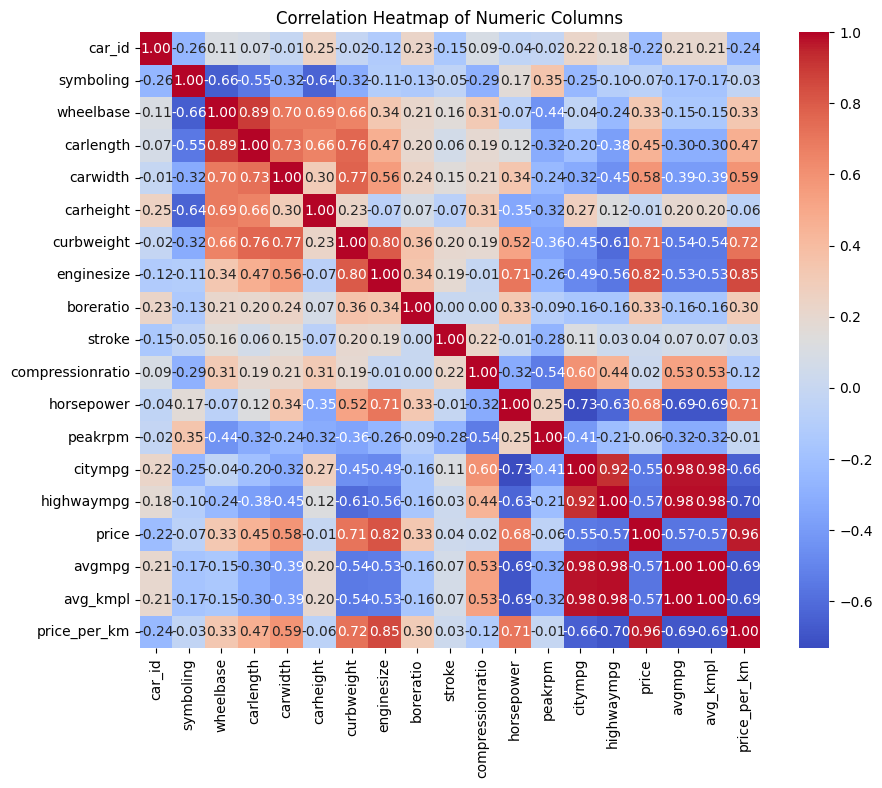

In [ ]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
#Find the most expensive car for each fuel type
idx = df.groupby('fueltype')['price'].idxmax()

# Select those rows
most_expensive_per_fuel = df.loc[idx, ['fueltype', 'carname', 'price']]

print(most_expensive_per_fuel)


   fueltype                          carname    price
70   diesel                    buick skyhawk  31600.0
74      gas  buick regal sport coupe (turbo)  45400.0


In [ ]:
# Extract brand (first word of carname)
df['brand'] = df['carname'].str.split(' ').str[0].str.lower()

# Find the most frequent brand
most_common_brand = df['brand'].mode()[0]
count = df['brand'].value_counts()[most_common_brand]

print(f"The most common brand is '{most_common_brand}' with {count} cars.")


The most common brand is 'peugeot' with 11 cars.


In [ ]:
#  Machine Learning

In [ ]:
# Correlation of numeric columns with price
correlations = df.corr(numeric_only=True)['price'].sort_values(ascending=False)

print(correlations)

price               1.000000
price_per_km        0.964559
enginesize          0.819635
curbweight          0.709607
horsepower          0.677695
carwidth            0.580656
carlength           0.446714
boreratio           0.331587
wheelbase           0.326255
stroke              0.035812
compressionratio    0.024977
carheight          -0.008984
peakrpm            -0.055646
symboling          -0.068365
car_id             -0.218506
citympg            -0.545532
highwaympg         -0.566738
avgmpg             -0.567680
avg_kmpl           -0.567680
Name: price, dtype: float64


In [ ]:
# Features and target
X = df[['enginesize', 'curbweight', 'horsepower', 'wheelbase']]
y = df['price']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

# Model score
print("R² score (train):", model.score(X_train, y_train))
print("R² score (test):", model.score(X_test, y_test))


Intercept: -16119.30026351714
Coefficients:
enginesize: 102.19845071603852
curbweight: 1.1007493240490982
horsepower: 54.413264398036354
wheelbase: 93.13522692009624
R² score (train): 0.7313277156041342
R² score (test): -0.40016571545031576
